__Dependencies__

In [1]:
import itertools  # operate with iterators

import matplotlib.pyplot as plt  # mother of plots focr Python
import pandas as pd  # operate with dataframes
import seaborn as sns  # matplotlib but write less do more
from tqdm.notebook import tqdm  # mother of progressbars for Python

# from matplotlib.ticker import FormatStrFormatter  # tick formatter

__Options__

In [2]:
# progress bar customized format
B_FORMAT = """📄 {n_fmt} of {total_fmt} {desc} processed: {bar} 
            {percentage:3.0f}% ⏱️{elapsed} ⏳{remaining} ⚙️{rate_fmt}{postfix}"""

# specify decimals format on pandas tables
pd.options.display.float_format = "{:.2f}".format

__Helper functions__

In [3]:
def query_plot(df, column=None, group=None):
    """Desc. and add parameters desc."""

    # generate colors
    palette = itertools.cycle(sns.color_palette(palette="muted"))
    colors_len = len(df[column].unique())
    colors = [next(palette) for i in range(colors_len)]

    # total number of samples (participants)
    total = df.index.size

    if group:
        # groupby plot
        ax = (
            df.groupby(group)[column]
            .value_counts()
            .unstack()
            .plot.bar(figsize=(15, 7), alpha=0.5, color=colors, rot=0)
        )
        title = f"{column.capitalize()} distribution per {group} (N={total})"
        column = group

    else:
        # plot
        ax = (
            df[column]
            .value_counts()
            .plot.bar(figsize=(15, 7), alpha=0.5, color=colors, rot=0)
        )
        title = f"{column.capitalize()} distribution (N={total})"

    # prepare xtick labels (include total and percentage) and set them
    cats = [lbl.get_text() for lbl in ax.get_xticklabels()]
    cats_n = [df[df[column] == cat].index.size for cat in cats]
    cats_p = [float(f"{cnt * 100 / total:.2f}") for cnt in cats_n]
    lbls = [f"{cat}\nN={n}\n{p}%" for cat, n, p in zip(cats, cats_n, cats_p)]
    ax.set_xticklabels(lbls)

    # set plot and y-axis titles
    plt.title(title)
    ax.set_ylabel("Total (frequency)")

    plt.show()  # display plot

__Read participants cleaned data__

In [4]:
parts = pd.read_csv("../participants_clean.csv", keep_default_na=False)
parts = parts.set_index("id")  # set uid column as index (remove default)
parts

,date,expo,side,condition,questionnaire
id,,,,,
4f583872ffed48249874b00f3d389cfc,2019-05-14 13:21:00,MSW,right,TaxiDriver,No
33d68ad55ef544fab9fd08108e3913ca,2019-05-14 16:44:00,MSW,right,AVAS,No
8598a83e2af441b8bcd0ae5d84beb875,2019-05-14 16:51:00,MSW,right,RadioTalk,No
37d7e67934974217830bb429bba7fd76,2019-05-14 16:54:00,MSW,left,AVAS,No
42bac596059749b5b8e8e83ae61de9b4,2019-05-14 16:56:00,MSW,right,TaxiDriver,No
...,...,...,...,...,...
cfe9482181f74f80b88cd4b1c048ab94,2019-12-30 15:29:00,BMBF,right,AVAS,No
611d35a7c3e940cc82495e53c2a8532d,2020-01-03 16:12:00,BMBF,right,TaxiDriver,No
3b6fda285d9e412eb081986b2f22a2e3,2020-01-03 16:13:00,BMBF,left,AVAS,No


__Read questionnaire cleaned data__

In [5]:
quests = pd.read_csv("../questionnaires.csv", keep_default_na=False)
quests = quests.set_index("id")  # set uid column as index (remove default)
quests

,date,Intention,Usefulness,Ease,Trust,Gender,Age,Aviophobia,Driving,Play,VR,expo,side,condition
id,,,,,,,,,,,,,,
ec61bab6e46741969bceb80ee2246983,2019-05-26 12:06:22,50,50,50,50,intersex,25,1,80,58,more than 10 times,MSW,right,RadioTalk
1fbde03890d94bddaf7aa987fc732607,2019-05-26 16:02:45,100,100,100,96,Male,13,0,0,5,once,MSW,left,RadioTalk
1ad9eea672a94518b150925bac41fcbc,2019-05-26 17:23:38,17,22,0,86,Female,24,0,4,2,once,MSW,right,RadioTalk
461b2d80132f47958e50003c16084cf4,2019-05-26 17:27:34,30,70,80,80,Male,22,0,3,1,less than 10 times,MSW,right,TaxiDriver
4f300efb4a9941f7a96f57e8030b12e2,2019-05-26 17:39:25,100,100,50,50,Male,16,0,0,3,less than 10 times,MSW,right,RadioTalk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eda9175e9e1d4153ac2ca3038b2ab008,2019-12-23 09:23:08,65,30,33,20,Male,12,0,0,25,once,BMBF,right,RadioTalk
b8c9e625f07444cc8d4a0fc245bab5dd,2019-12-23 09:28:25,100,50,50,100,Female,12,1,99,9,less than 10 times,BMBF,right,TaxiDriver
2cd78ad9a37945de9f8cfd5f81c42082,2019-12-27 12:56:23,86,20,71,69,Male,57,0,39,0,never,BMBF,right,RadioTalk


__Finished rides__

Exhibition

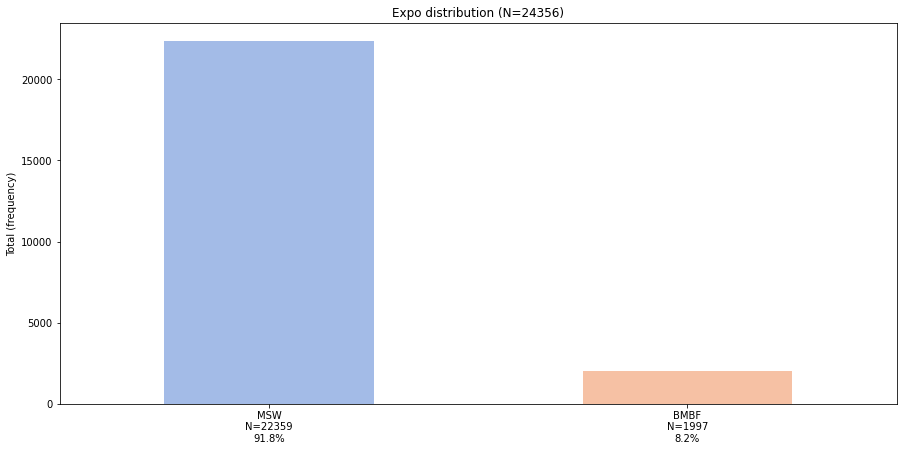

In [6]:
query_plot(df=parts, column="expo")

Exhibition and side

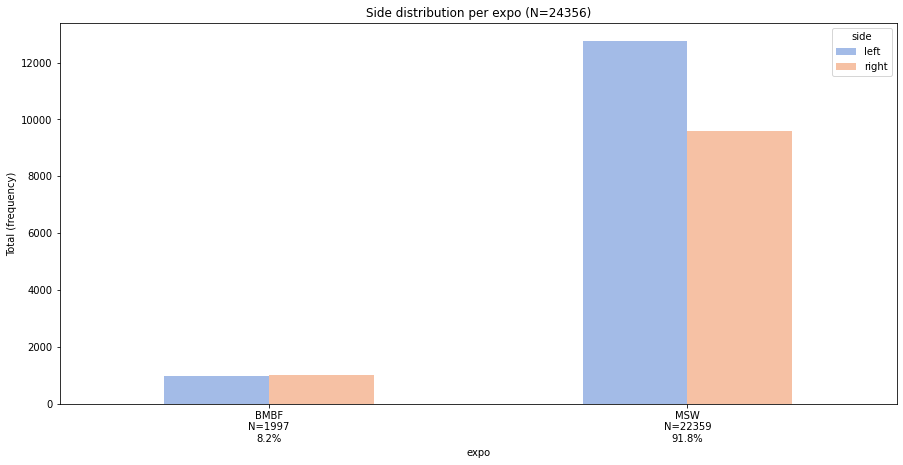

Counts:


expo,BMBF,MSW
side,,
left,984,12753
right,1013,9606


Percentages:


expo,BMBF,MSW
side,,
left,49.27,57.04
right,50.73,42.96


In [7]:
df = parts
column = "side"
group = "expo"
query_plot(df=df, column=column, group=group)

print("Counts:")
display(df.groupby(group)[column].value_counts().unstack().transpose())
print("Percentages:")
display(
    df.groupby(group)[column]
    .value_counts(normalize=True)
    .unstack()
    .transpose()
    * 100
)

Condition

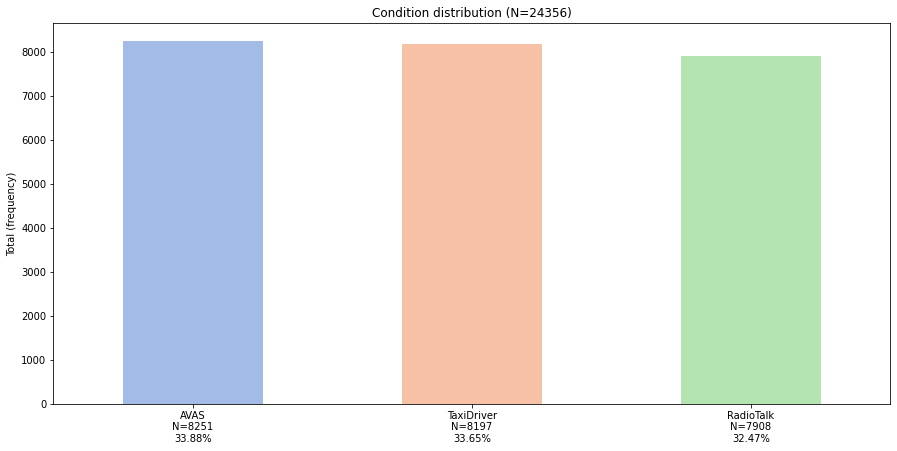

In [8]:
query_plot(df=parts, column="condition")

Condition and exhibition

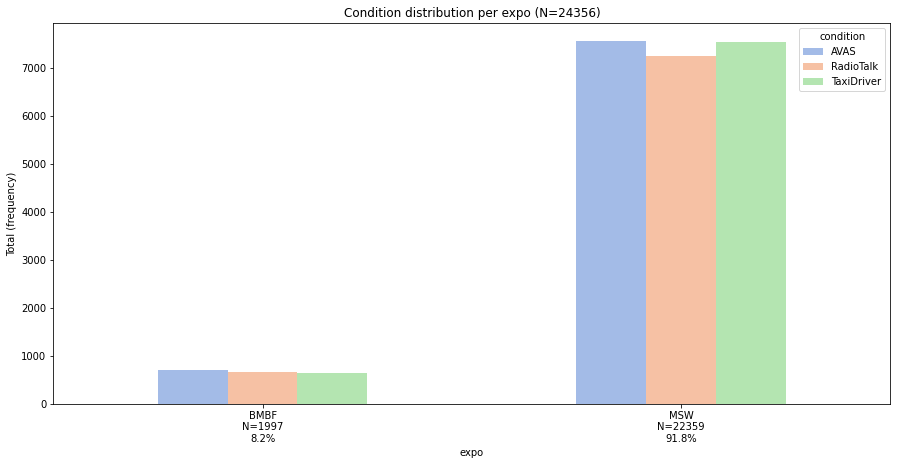

Counts:


expo,BMBF,MSW
condition,,
AVAS,692,7559
RadioTalk,660,7248
TaxiDriver,645,7552


Percentages:


expo,BMBF,MSW
condition,,
AVAS,34.65,33.81
RadioTalk,33.05,32.42
TaxiDriver,32.30,33.78


In [9]:
df = parts
column = "condition"
group = "expo"
query_plot(df=df, column=column, group=group)

print("Counts:")
display(df.groupby(group)[column].value_counts().unstack().transpose())
print("Percentages:")
display(
    df.groupby(group)[column]
    .value_counts(normalize=True)
    .unstack()
    .transpose()
    * 100
)

Side

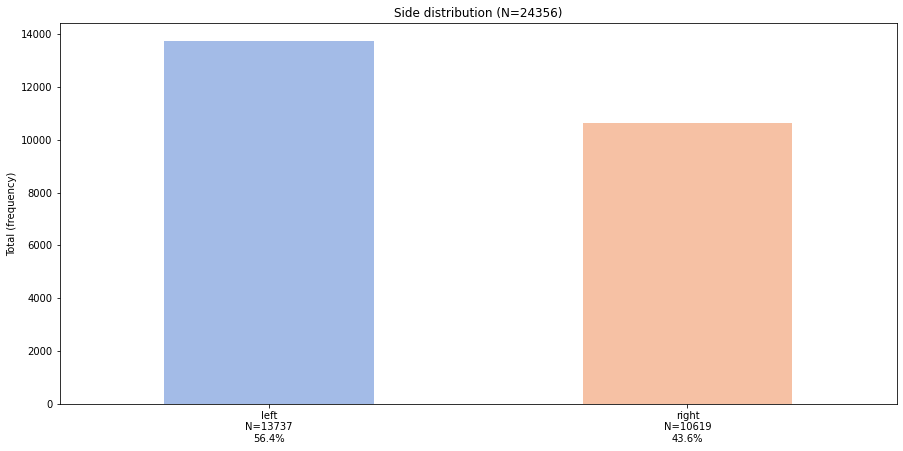

In [10]:
query_plot(df=parts, column="side")

Side and condition

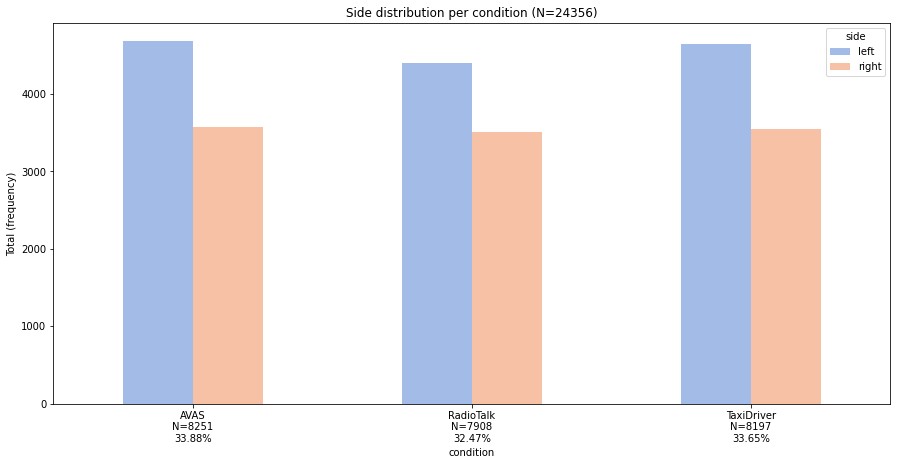

Counts:


condition,AVAS,RadioTalk,TaxiDriver
side,,,
left,4683,4402,4652
right,3568,3506,3545


Percentages:


condition,AVAS,RadioTalk,TaxiDriver
side,,,
left,56.76,55.67,56.75
right,43.24,44.33,43.25


In [11]:
df = parts
column = "side"
group = "condition"
query_plot(df=df, column=column, group=group)

print("Counts:")
display(df.groupby(group)[column].value_counts().unstack().transpose())
print("Percentages:")
display(
    df.groupby(group)[column]
    .value_counts(normalize=True)
    .unstack()
    .transpose()
    * 100
)

Condition and side

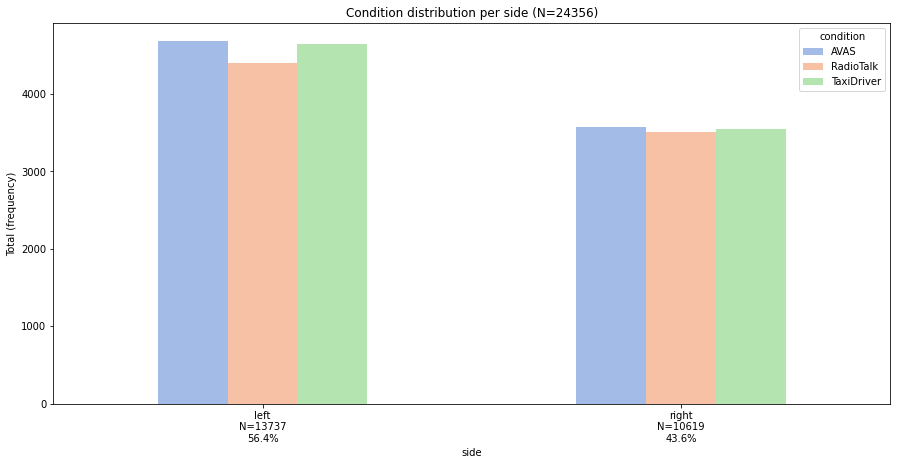

Counts:


side,left,right
condition,,
AVAS,4683,3568
RadioTalk,4402,3506
TaxiDriver,4652,3545


Percentages:


side,left,right
condition,,
AVAS,34.09,33.60
RadioTalk,32.04,33.02
TaxiDriver,33.86,33.38


In [12]:
df = parts
column = "condition"
group = "side"
query_plot(df=df, column=column, group=group)

print("Counts:")
display(df.groupby(group)[column].value_counts().unstack().transpose())
print("Percentages:")
display(
    df.groupby(group)[column]
    .value_counts(normalize=True)
    .unstack()
    .transpose()
    * 100
)

__Finished rides with questionnaire__

Exhibition

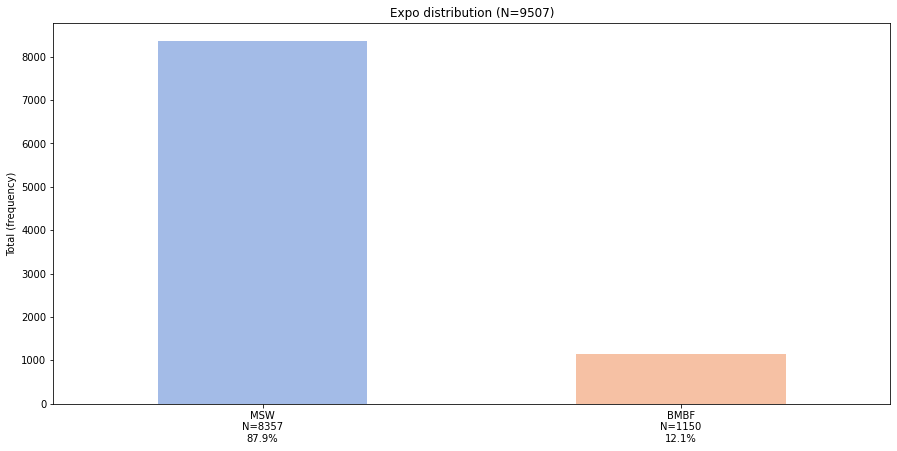

In [13]:
query_plot(df=quests, column="expo")

Exhibition and side

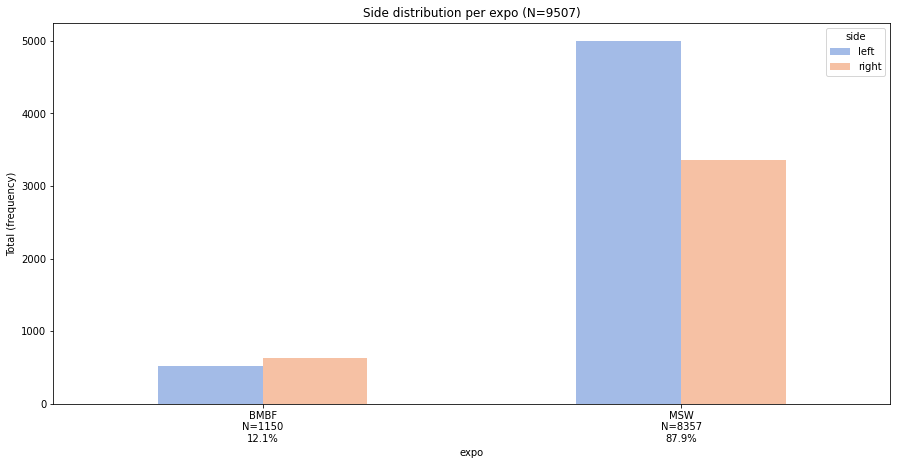

Counts:


expo,BMBF,MSW
side,,
left,517,4996
right,633,3361


Percentages:


expo,BMBF,MSW
side,,
left,44.96,59.78
right,55.04,40.22


In [14]:
df = quests
column = "side"
group = "expo"
query_plot(df=df, column=column, group=group)

print("Counts:")
display(df.groupby(group)[column].value_counts().unstack().transpose())
print("Percentages:")
display(
    df.groupby(group)[column]
    .value_counts(normalize=True)
    .unstack()
    .transpose()
    * 100
)

Condition

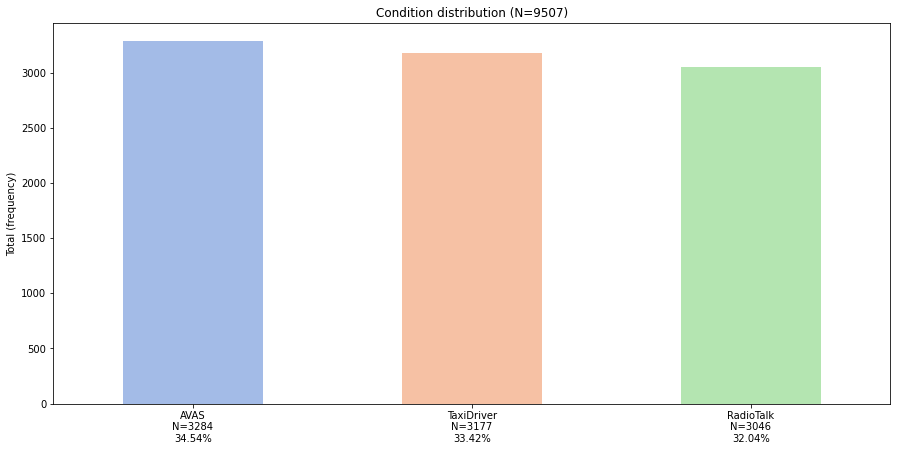

In [15]:
query_plot(df=quests, column="condition")

Condition and exhibition

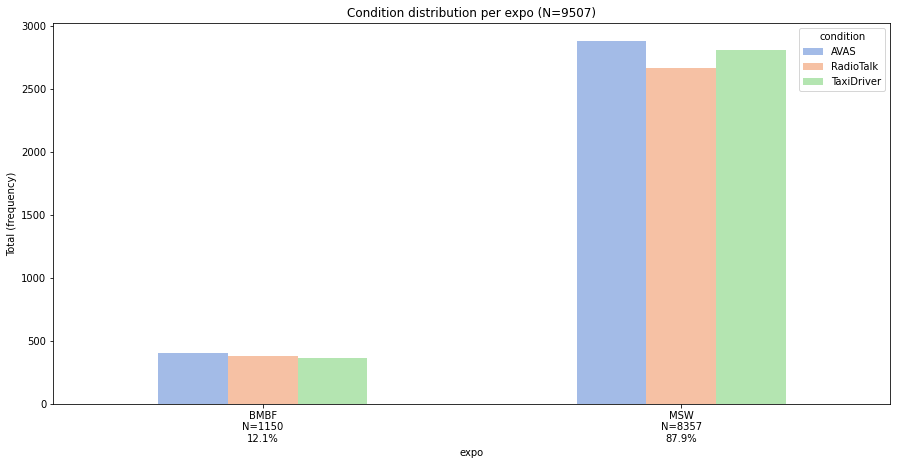

Counts:


expo,BMBF,MSW
condition,,
AVAS,404,2880
RadioTalk,380,2666
TaxiDriver,366,2811


Percentages:


expo,BMBF,MSW
condition,,
AVAS,35.13,34.46
RadioTalk,33.04,31.90
TaxiDriver,31.83,33.64


In [16]:
df = quests
column = "condition"
group = "expo"
query_plot(df=df, column=column, group=group)

print("Counts:")
display(df.groupby(group)[column].value_counts().unstack().transpose())
print("Percentages:")
display(
    df.groupby(group)[column]
    .value_counts(normalize=True)
    .unstack()
    .transpose()
    * 100
)

Side

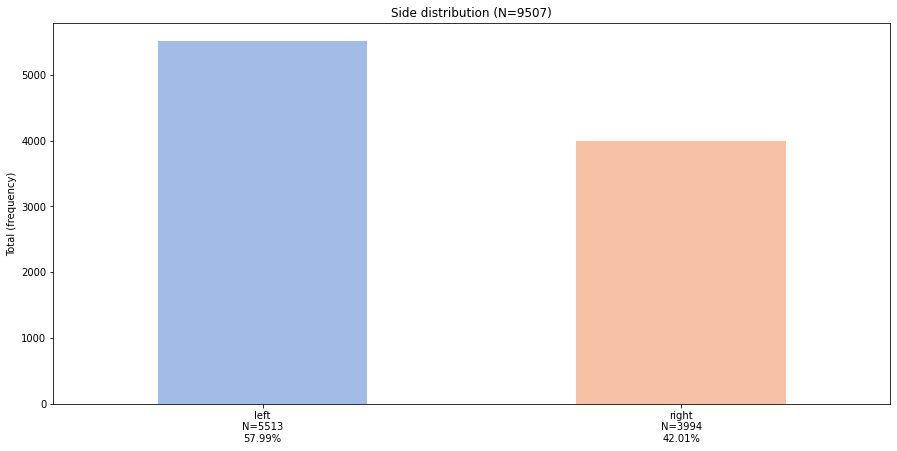

In [17]:
query_plot(df=quests, column="side")

Side and condition

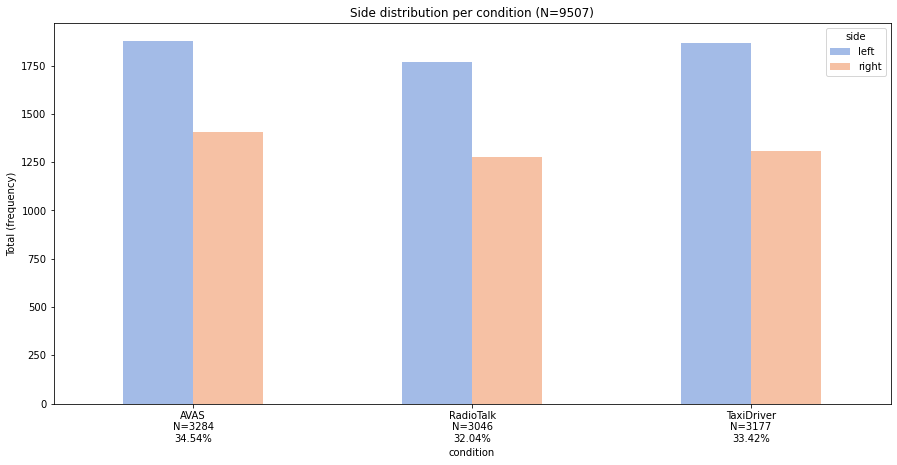

Counts:


condition,AVAS,RadioTalk,TaxiDriver
side,,,
left,1876,1768,1869
right,1408,1278,1308


Percentages:


condition,AVAS,RadioTalk,TaxiDriver
side,,,
left,57.13,58.04,58.83
right,42.87,41.96,41.17


In [18]:
df = quests
column = "side"
group = "condition"
query_plot(df=df, column=column, group=group)

print("Counts:")
display(df.groupby(group)[column].value_counts().unstack().transpose())
print("Percentages:")
display(
    df.groupby(group)[column]
    .value_counts(normalize=True)
    .unstack()
    .transpose()
    * 100
)

Condition and side

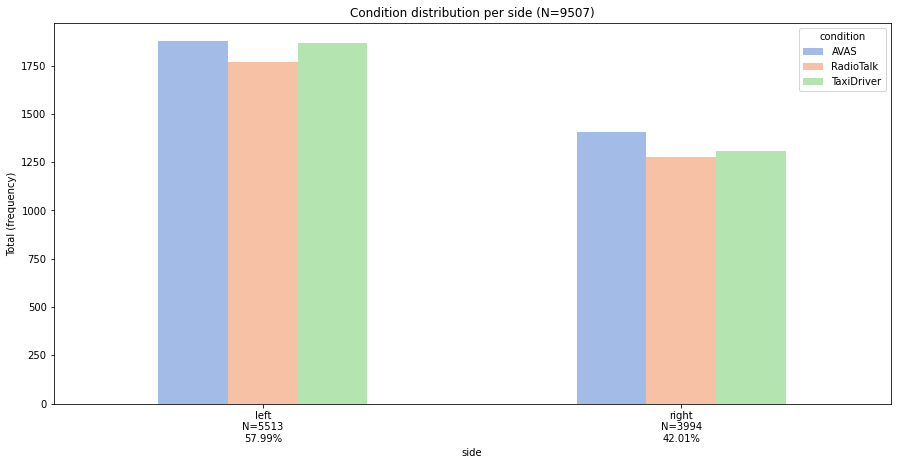

Counts:


side,left,right
condition,,
AVAS,1876,1408
RadioTalk,1768,1278
TaxiDriver,1869,1308


Percentages:


side,left,right
condition,,
AVAS,34.03,35.25
RadioTalk,32.07,32.00
TaxiDriver,33.90,32.75


In [19]:
df = quests
column = "condition"
group = "side"
query_plot(df=df, column=column, group=group)

print("Counts:")
display(df.groupby(group)[column].value_counts().unstack().transpose())
print("Percentages:")
display(
    df.groupby(group)[column]
    .value_counts(normalize=True)
    .unstack()
    .transpose()
    * 100
)